In [10]:

%matplotlib inline
import rasterio
import numpy
from matplotlib import pyplot as plt

In [11]:

# Our single 4 band (blue, green, red, NIR) PlanetScope image.
image_file = "clipped_Jun_29.tif"
image_file1 = "clipped_Sep_02.tif"
# Let's get our rasterio object:
my_image = rasterio.open(image_file)
my_image
my_image1 = rasterio.open(image_file1)
my_image1

<open DatasetReader name='clipped_Sep_02.tif' mode='r'>

In [12]:
# The PlanetScope band order is BGRN.
blue, green, red, nir = my_image.read()
blue1, green1, red1, nir1 = my_image1.read()
blue

array([[    0,     0,     0, ...,     0,     0,     0],
       [10742, 10788, 10666, ..., 10456, 10720,     0],
       [10756, 10718, 10720, ..., 10437, 10562,     0],
       ...,
       [10969, 10971, 10957, ..., 10934, 10870,     0],
       [10960, 10932, 10933, ..., 10855, 10855,     0],
       [10928, 10865, 10901, ..., 10977, 10899,     0]], dtype=uint16)

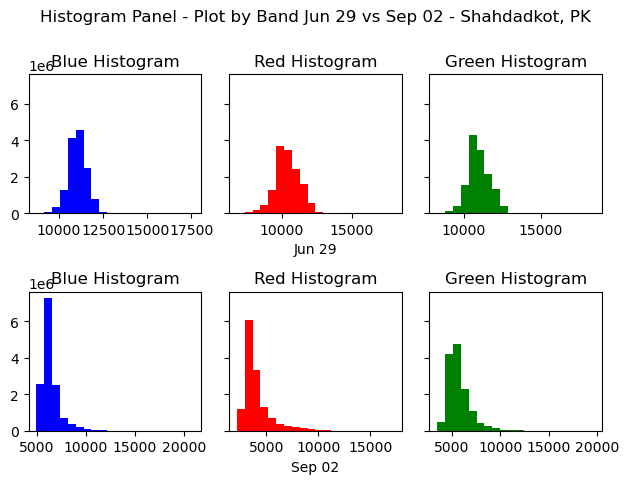

In [23]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(2, 3, sharey=True) #<- here is the difference as we state we want a shared axis

# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]
green_data = green[numpy.not_equal(green, my_image.nodata)]
nir_data = nir[numpy.not_equal(nir, my_image.nodata)]
blue_data1 = blue1[numpy.not_equal(blue, my_image1.nodata)]
red_data1 = red1[numpy.not_equal(red, my_image1.nodata)]
green_data1 = green1[numpy.not_equal(green, my_image1.nodata)]
nir_data1 = nir1[numpy.not_equal(nir, my_image1.nodata)]

bin_number = 20
# Specify the .hist() function to create the hist
ax1[0].hist(blue_data, color='blue', bins=bin_number)
ax1[1].hist(red_data, color='red', bins=bin_number)
ax1[2].hist(green_data, color='green', bins=bin_number)
#ax1[3].hist(nir_data, color='gray', bins=bin_number) #range = [1200, 1800])
#ax1[4].hist((green_data - nir_data) / (green_data + nir_data), color='c', bins=bin_number)
ax2[0].hist(blue_data1, color='blue', bins=bin_number)
ax2[1].hist(red_data1, color='red', bins=bin_number)
ax2[2].hist(green_data1, color='green', bins=bin_number)
#ax2[3].hist(nir_data1, color='gray', bins=bin_number) #range = [1200, 1800])
#ax1[4].hist((green_data1 - nir_data1) / (green_data1 + nir_data1), color='c', bins=bin_number)

# Now add plot titles 
ax1[0].set_title('Blue Histogram')
ax1[1].set_title('Red Histogram')
ax1[2].set_title('Green Histogram')
#ax1[3].set_title('NIR Histogram')
ax2[0].set_title('Blue Histogram')
ax2[1].set_title('Red Histogram')
ax2[2].set_title('Green Histogram')
ax1[1].set_xlabel('Jun 29')
ax2[1].set_xlabel('Sep 02')

# Let's add an overall title to a plot
# The y argument moves the title higher, so we don't have overlapping text
plt.suptitle('Histogram Panel - Plot by Band Jun 29 vs Sep 02 - Shahdadkot, PK', y=1)  

# This makes sure we have sufficient space between our plots
fig.tight_layout()

# Now export the final plot!
#fig.savefig("histogramPLOT_3Bands.png", dpi=200, bbox_inches='tight', pad_inches=0.7)